<a href="https://colab.research.google.com/github/Rogerio-mack/PythonEE/blob/main/LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# df = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/guinearice.csv', parse_dates=['date'], index_col='date')
df = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Baseline

Um modelo de regressão linear não é um modelo ideal... mas pode fornecer um **primeiro modelo** base para modelos melhores.

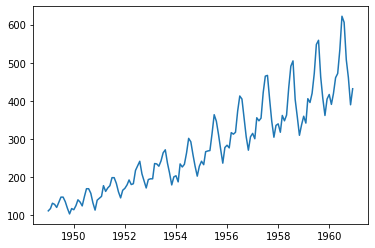

In [3]:
plt.plot(df['value'])
plt.show()

# Regressão Linear

A regressão linear consiste em encontrarmos os coeficientes da reta que melhor aproxima o conjunto de pontos da série...

$$ \hat y = a_0 + a_1 x$$

e 

$$ \min \text{ERRO}(y, \hat y) $$

onde $y$ são os valores da série e $x$, a escala de *tempo*. O problema é que **não podemos empregar datas como variáveis da função!** (imagine, o que é 0.5 * 1964/05/26???). Assim vamos substituir a escala de tempo por valores de *intervalos de tempo*:



In [4]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [5]:
df['time'] = np.arange(len(df))
df.head()

,value,time
date,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4


O resultado é o mesmo, mas nossas variáveis do eixo $x$ são agora valores numéricos e podemos aplicar uma função e fazer cálculos com esses valores.

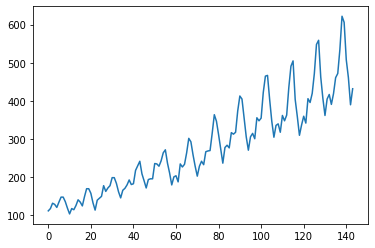

In [10]:
plt.plot(df['time'],df['value'])
plt.show()

Com não temos empregaremos o índice de Série Temporal é mais simples excluírmos os índices para trabalharmos somente com os valores $y$, `value`, e $x$, `time`.  

In [7]:
df = df.reset_index()
df.head()

,date,value,time
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4


# Esquema de Aplicação de Um Regressor

O esquema abaixo pode ser aplicado para qualquer conjunto de entradas e saídas para ajustar uma reta ao conjunto de pontos.

In [8]:
from sklearn.linear_model import LinearRegression

# Training data
X = df[['time']]  # features
y = df['value']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Valores Previstos

Aqui os valores previstos e a série original.

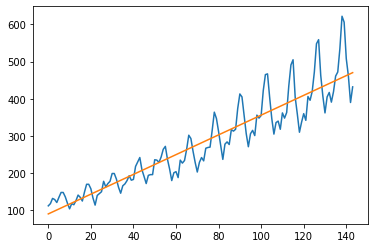

In [9]:
plt.plot(df['time'], df['value'])
plt.plot(df['time'], y_pred)
plt.show()